# Название проекта: прогнозирование оттока клиентов.

## Описание исследования: 
**Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.**

### Описание услуг

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).  

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

## Цель проекта: научить модель прогнозировать отток клиентов.

## 1. Анализ данных

Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

!pip install phik -q
import phik

from sklearn.model_selection import (
    GridSearchCV, 
    RandomizedSearchCV,
    train_test_split)
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler
)
from sklearn.model_selection import cross_val_score
import lightgbm as lgb

from sklearn.metrics import confusion_matrix
from numpy import argmax
from sklearn.metrics import f1_score
from numpy import arange

random = 190623

import time 

start = time.time()


[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Загрузка данных

In [2]:
contract = pd.read_csv('/datasets/contract_new.csv')

personal = pd.read_csv('/datasets/personal_new.csv')
    
internet = pd.read_csv('/datasets/internet_new.csv')

phone = pd.read_csv('/datasets/phone_new.csv')

Список с таблицами для удобного вывода информации по ним

In [3]:
df = [contract, personal, internet, phone]

Функция для удобного нейминга

In [4]:
def naming(num):
    if num == 0:
        print('Данные для таблицы contract')
    elif num == 1:
        print('Данные для таблицы personal')
    elif num == 2:
        print('Данные для таблицы internet')
    elif num == 3:
        print('Данные для таблицы phone')

Вывод первых 5 строк по каждой таблице

In [5]:
for i in range(len(df)):
    naming(i)
    print()
    display(df[i].head())
    print()

Данные для таблицы contract



,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5



Данные для таблицы personal



,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No



Данные для таблицы internet



,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No



Данные для таблицы phone



,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


Вывод информации по каждой таблице

In [6]:
for i in range(len(df)):
    naming(i)
    print()
    display(df[i].info())
    print()

Данные для таблицы contract

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None


Данные для таблицы personal

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None


Данные для таблицы internet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None


Данные для таблицы phone

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None

Данные не имеют пропусков, но имеют разную размерность. Необходимо поменять тип данных в столбцах

In [7]:
contract['customerID'].unique().shape

(7043,)

In [8]:
personal['customerID'].unique().shape

(7043,)

In [9]:
internet['customerID'].unique().shape

(5517,)

In [10]:
phone['customerID'].unique().shape

(6361,)

Кол-во уникальных id соответствует размерности датасета

Создание признаков с наличием телефонной линии и интернета у клиента

Объединение таблиц

In [11]:
df = contract

In [12]:
df = df.merge(personal, left_on = 'customerID', right_on = 'customerID', how = 'outer')
df = df.merge(internet, left_on = 'customerID', right_on = 'customerID', how = 'outer')
df = df.merge(phone, left_on = 'customerID', right_on = 'customerID', how = 'outer')

In [13]:
display(df.head())

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


Замена пропусков в столбцах из таблицы internet и phone. Т.к. если там нет значений, значит у клиента нет этой услуги

In [14]:
df['InternetService'] = df['InternetService'].fillna('No')

In [15]:
df['OnlineSecurity'] = df['OnlineSecurity'].fillna('No')

In [16]:
df['OnlineBackup'] = df['OnlineBackup'].fillna('No')

In [17]:
df['DeviceProtection'] = df['DeviceProtection'].fillna('No')

In [18]:
df['TechSupport'] = df['TechSupport'].fillna('No')

In [19]:
df['StreamingTV'] = df['StreamingTV'].fillna('No')

In [20]:
df['StreamingMovies'] = df['StreamingMovies'].fillna('No')

In [21]:
df['MultipleLines'] = np.where(df['MultipleLines'] == 'Yes', 'Yes', 'Without')

Количество пользователей пользующихся и интернетом и телефонией

In [22]:
internet['customerID'].isin(phone['customerID']).sum()

4835

In [23]:
display(df.head())

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,Without
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,Without
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,Without
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,Without
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5,Female,0,No,No,Fiber optic,No,No,No,No,No,No,Without


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   7043 non-null   object 
 13  OnlineSecurity    7043 non-null   object 
 14  OnlineBackup      7043 non-null   object 
 15  DeviceProtection  7043 non-null   object 
 16  TechSupport       7043 non-null   object 


In [25]:
df['TotalCharges'].sort_values()

3331          
4380          
6670          
488           
3826          
         ...  
2880    997.78
3267    998.89
6023     999.6
1700     999.6
1625     999.9
Name: TotalCharges, Length: 7043, dtype: object

In [26]:
df[df['TotalCharges']==' ']

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,,Female,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,No,Without
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,,Male,0,No,Yes,No,No,No,No,No,No,No,Without
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,Without
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,,Male,0,Yes,Yes,No,No,No,No,No,No,No,Yes
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,Without
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,,Male,0,Yes,Yes,No,No,No,No,No,No,No,Without
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,,Male,0,Yes,Yes,No,No,No,No,No,No,No,Yes
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,,Female,0,Yes,Yes,No,No,No,No,No,No,No,Without
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,,Male,0,Yes,Yes,No,No,No,No,No,No,No,Without
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,,Female,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Yes


11 значений в столбце TotalCharges заполнены пробелом. Пропуски появились у клиентов, начало контракта которых день выгрузки. Эти данные можно удалить, т.к. это менее 1% от данных.

In [27]:
df['TotalCharges'] = np.where(df['TotalCharges'] == ' ', 0, df['TotalCharges'])

In [28]:
df = df.astype({'TotalCharges':'float64'})
df['BeginDate'] = pd.to_datetime(df['BeginDate'])

Добавление признака с кол-вом дней клиента в компании.

Заменим значения No в столбце EndDate на дату выгрузки, т.к. стобцы с датой нам дальше не понадобятся(нет задачи прогнозирования временных рядов)

In [29]:
df[df['EndDate']=='No'].count()

customerID          5942
BeginDate           5942
EndDate             5942
Type                5942
PaperlessBilling    5942
PaymentMethod       5942
MonthlyCharges      5942
TotalCharges        5942
gender              5942
SeniorCitizen       5942
Partner             5942
Dependents          5942
InternetService     5942
OnlineSecurity      5942
OnlineBackup        5942
DeviceProtection    5942
TechSupport         5942
StreamingTV         5942
StreamingMovies     5942
MultipleLines       5942
dtype: int64

In [30]:
df.loc[(df.EndDate == 'No'), 'EndDate'] = '2020-02-01'

In [31]:
df[df['EndDate']=='2020-02-01'].count()

customerID          5942
BeginDate           5942
EndDate             5942
Type                5942
PaperlessBilling    5942
PaymentMethod       5942
MonthlyCharges      5942
TotalCharges        5942
gender              5942
SeniorCitizen       5942
Partner             5942
Dependents          5942
InternetService     5942
OnlineSecurity      5942
OnlineBackup        5942
DeviceProtection    5942
TechSupport         5942
StreamingTV         5942
StreamingMovies     5942
MultipleLines       5942
dtype: int64

Людей ушедших в день выгрузки нет, данные не искажаются при создании признака leave

Изменение типа данных

In [32]:
df['EndDate'] = pd.to_datetime(df['EndDate'])

In [33]:
df['day'] = (df['EndDate'] - df['BeginDate']).dt.days

Добавление целевого признака

In [34]:
df['leave'] = np.where(df['EndDate'] == '2020-02-01', '0', '1')

In [35]:
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,day,leave
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,...,DSL,No,Yes,No,No,No,No,Without,31,0
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,Male,0,...,DSL,Yes,No,Yes,No,No,No,Without,1036,0
2,3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,...,DSL,Yes,Yes,No,No,No,No,Without,123,0
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,...,DSL,Yes,No,Yes,Yes,No,No,Without,1371,0
4,9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,...,Fiber optic,No,No,No,No,No,No,Without,153,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  InternetService   7043 non-null   object        
 13  OnlineSecurity    7043 non-null   object        
 14  OnlineBackup      7043 n

Изменение типа данных в столбце leave

In [37]:
df = df.astype({'leave':'int32'})

Построим диаграммы

## Исследовательский анализ данных

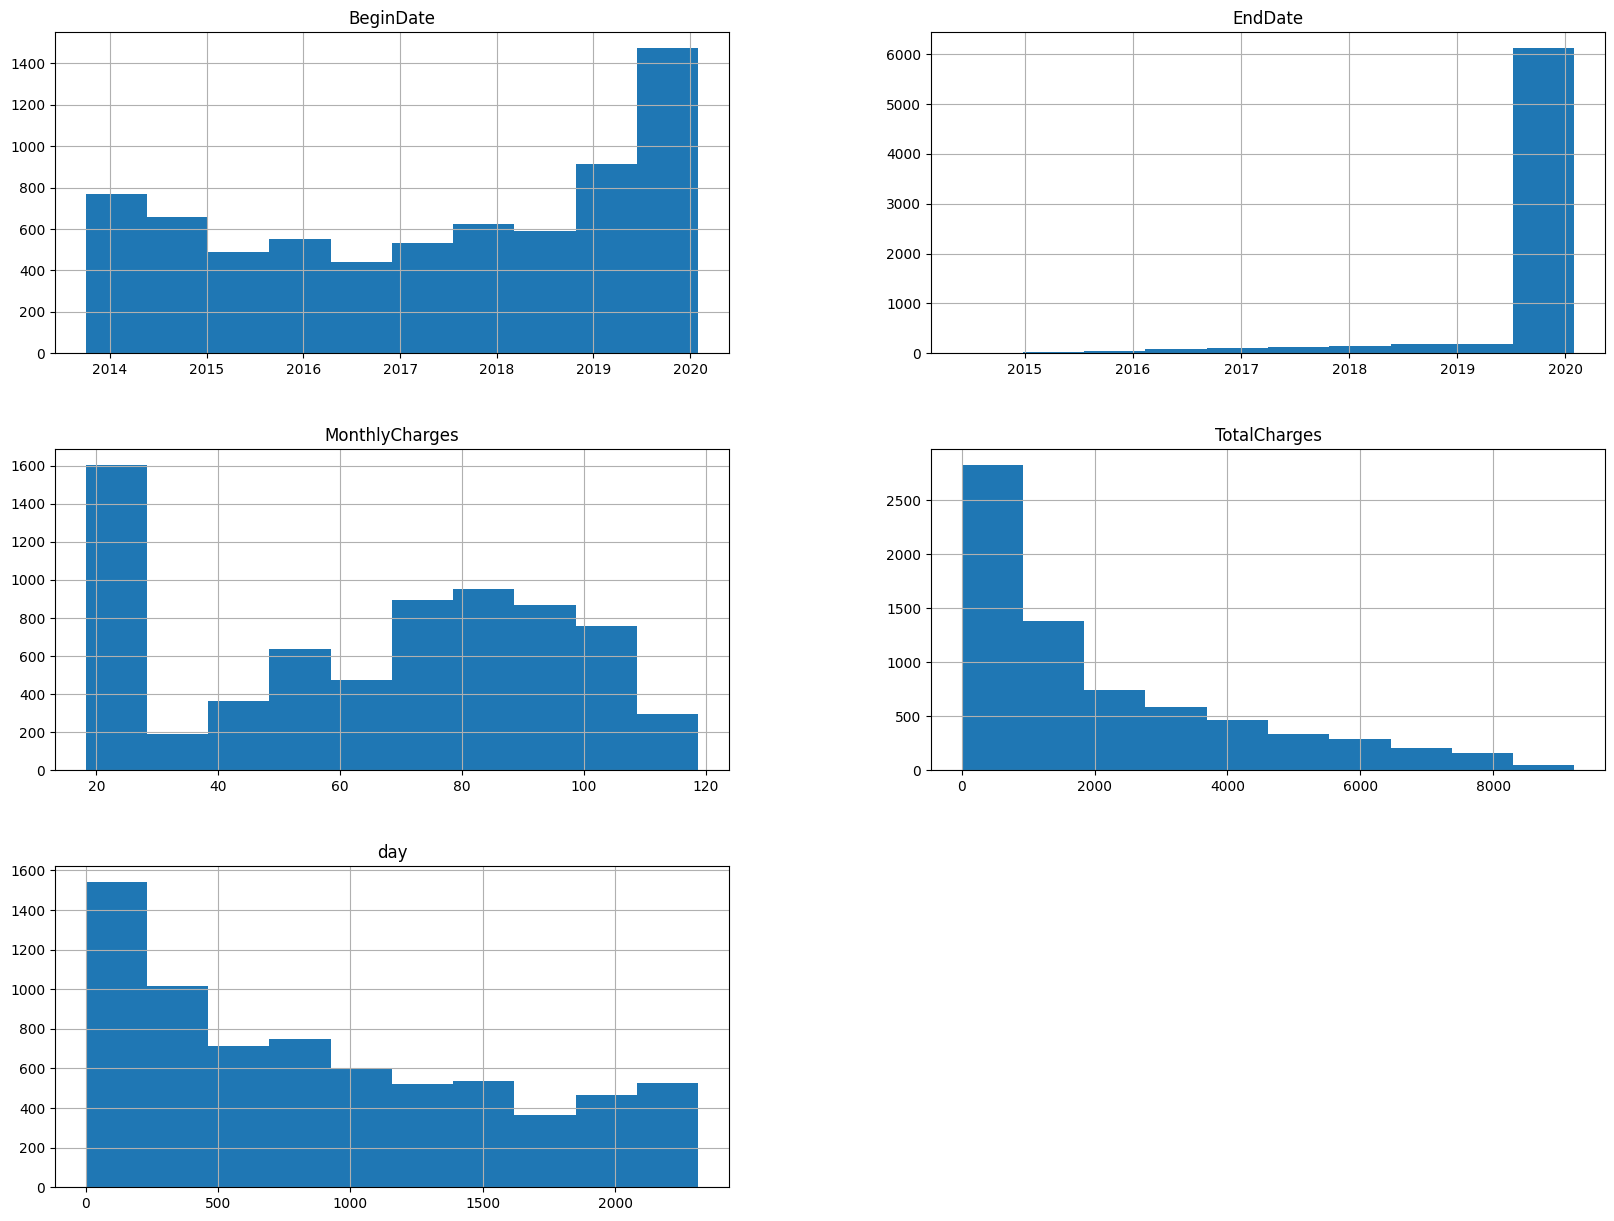

In [38]:
df[['BeginDate', 'EndDate', 'MonthlyCharges', 'TotalCharges', 'day']].hist(figsize=(20,15));

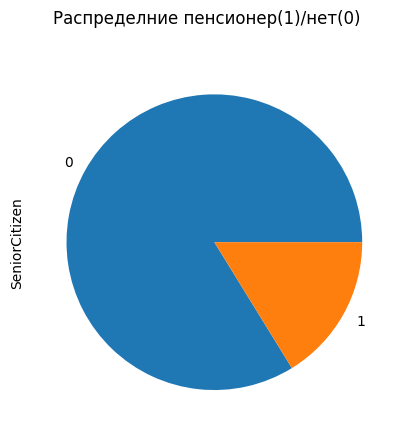

In [39]:
df.groupby('SeniorCitizen')['SeniorCitizen'].count().plot(kind='pie')
plt.suptitle("Распределние пенсионер(1)/нет(0)"); 

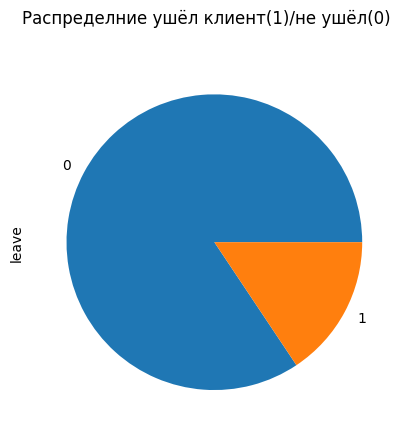

In [40]:
df.groupby('leave')['leave'].count().plot(kind='pie')
plt.suptitle("Распределние ушёл клиент(1)/не ушёл(0)"); 

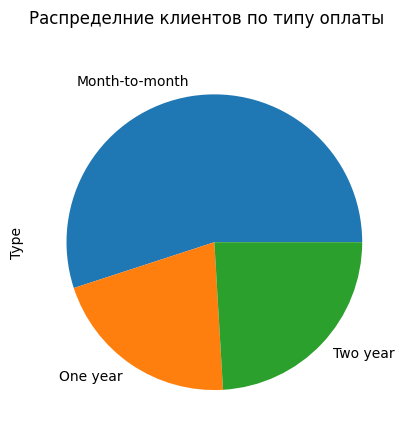

In [41]:
df.groupby('Type')['Type'].count().plot(kind='pie')
plt.suptitle("Распределние клиентов по типу оплаты"); 

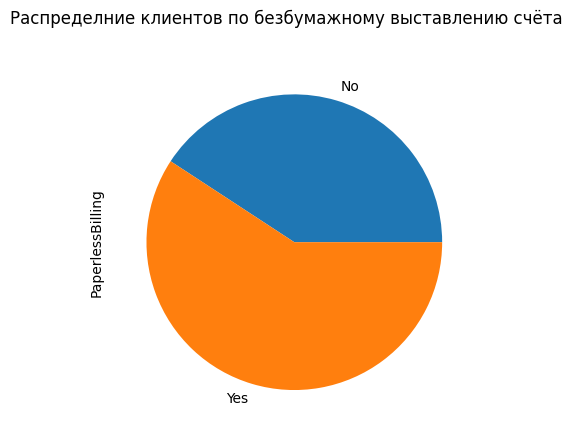

In [42]:
df.groupby('PaperlessBilling')['PaperlessBilling'].count().plot(kind='pie')
plt.suptitle("Распределние клиентов по безбумажному выставлению счёта"); 

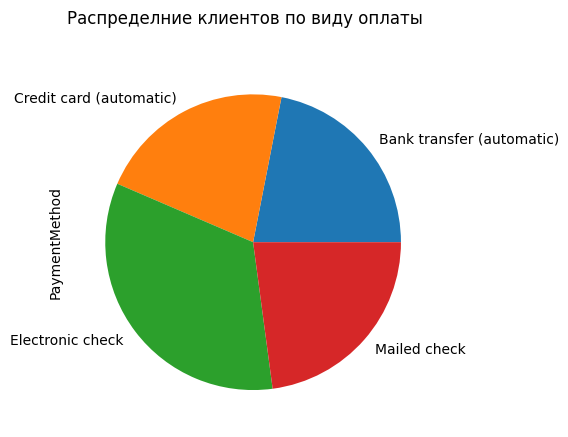

In [43]:
df.groupby('PaymentMethod')['PaymentMethod'].count().plot(kind='pie')
plt.suptitle("Распределние клиентов по виду оплаты");  

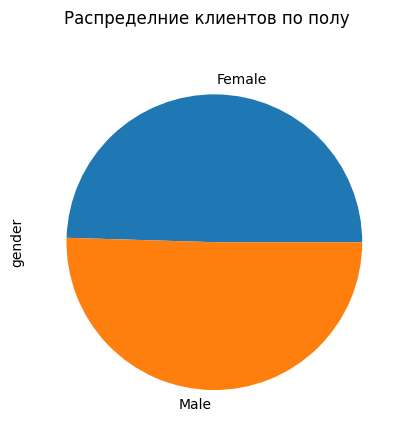

In [44]:
df.groupby('gender')['gender'].count().plot(kind='pie')
plt.suptitle("Распределние клиентов по полу"); 

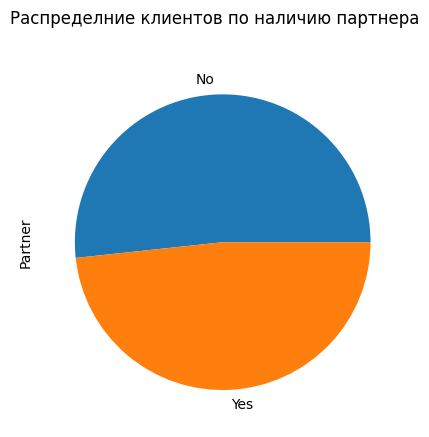

In [45]:
df.groupby('Partner')['Partner'].count().plot(kind='pie')
plt.suptitle("Распределние клиентов по наличию партнера");  

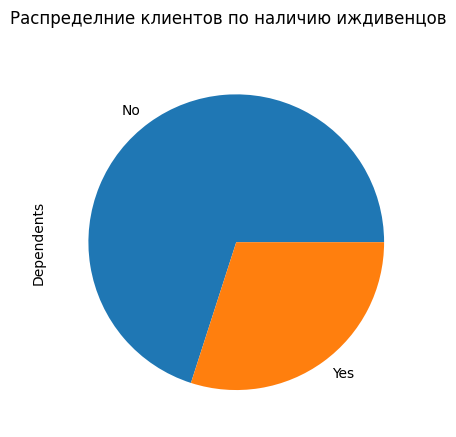

In [46]:
df.groupby('Dependents')['Dependents'].count().plot(kind='pie')
plt.suptitle("Распределние клиентов по наличию иждивенцов");  

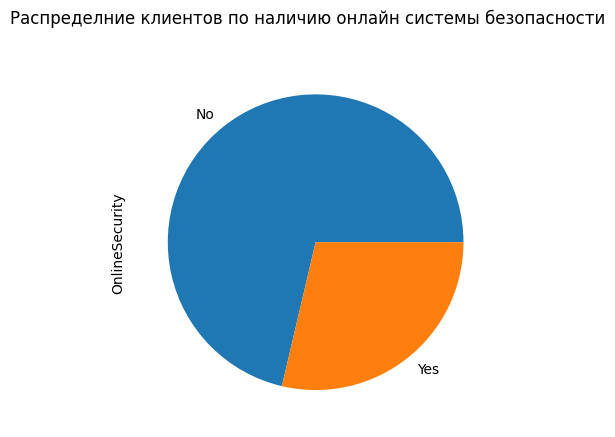

In [47]:
df.groupby('OnlineSecurity')['OnlineSecurity'].count().plot(kind='pie')
plt.suptitle("Распределние клиентов по наличию онлайн системы безопасности");  

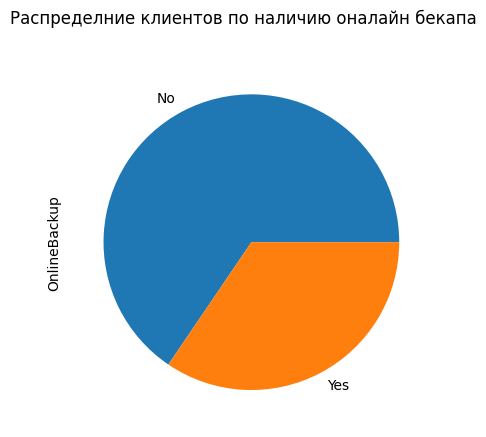

In [48]:
df.groupby('OnlineBackup')['OnlineBackup'].count().plot(kind='pie')
plt.suptitle("Распределние клиентов по наличию оналайн бекапа");  

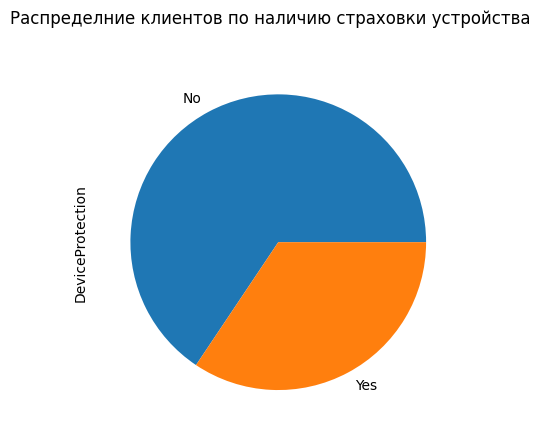

In [49]:
df.groupby('DeviceProtection')['DeviceProtection'].count().plot(kind='pie')
plt.suptitle("Распределние клиентов по наличию страховки устройства");   

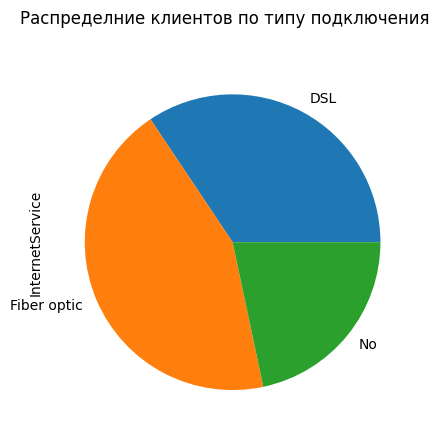

In [50]:
df.groupby('InternetService')['InternetService'].count().plot(kind='pie')
plt.suptitle("Распределние клиентов по типу подключения");    

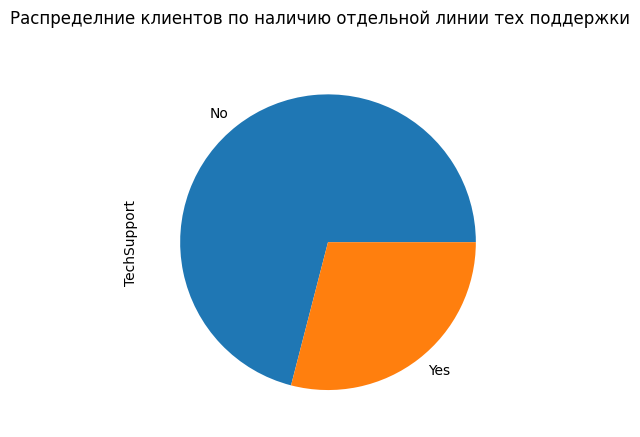

In [51]:
df.groupby('TechSupport')['TechSupport'].count().plot(kind='pie')
plt.suptitle("Распределние клиентов по наличию отдельной линии тех поддержки");     

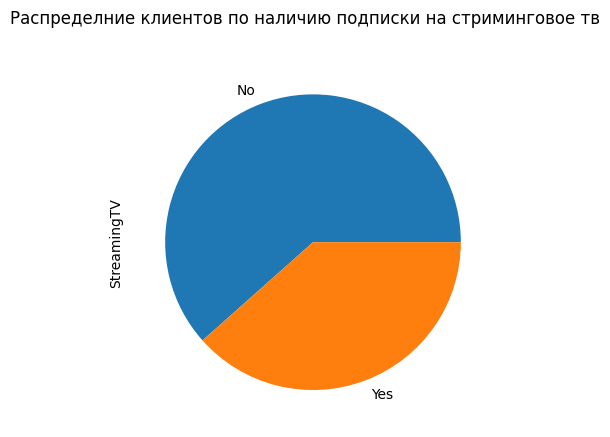

In [52]:
df.groupby('StreamingTV')['StreamingTV'].count().plot(kind='pie')
plt.suptitle("Распределние клиентов по наличию подписки на стриминговое тв");      

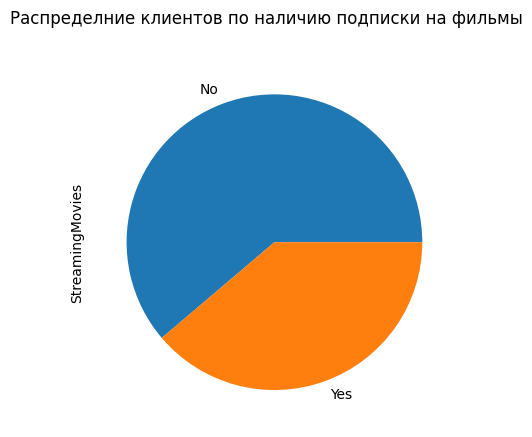

In [53]:
df.groupby('StreamingMovies')['StreamingMovies'].count().plot(kind='pie')
plt.suptitle("Распределние клиентов по наличию подписки на фильмы");       

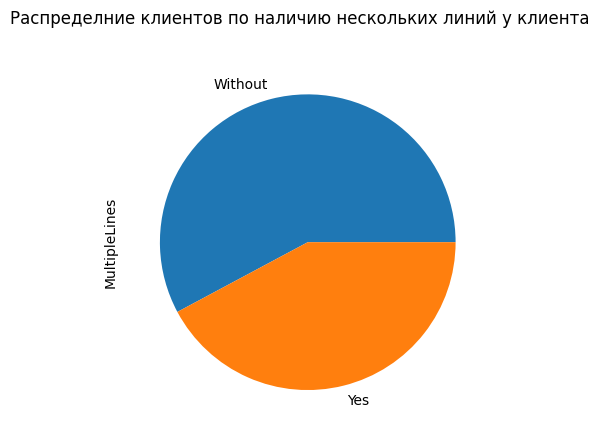

In [54]:
df.groupby('MultipleLines')['MultipleLines'].count().plot(kind='pie')
plt.suptitle("Распределние клиентов по наличию нескольких линий у клиента");        

Большое кол-во клиентов имеет месячную плату в 20 долларов, отбрасывать это значение не желательно, следует уточнить у заказчика. Возможно это самый популярный тариф. Большинство клиентов имеет помесячную оптлату, и в равной степени годовую и 2-х годовую предоплату. Большинство клиентов пользуется оплатой с потдверждением онлайн и почтой, почти в равной степени авто оплата переводом из банка и картой. Кол-во клиентов мужчин и женшин почти равное. Большинство клиентов использует подключение Fiber optic, немногим меньшим DSL и около 1500 клиентов не используют интернет.

Преобразование стобца endDate отдельно, т.к. в основной таблице этому препятствуют значения None \
Вывод гистограммы

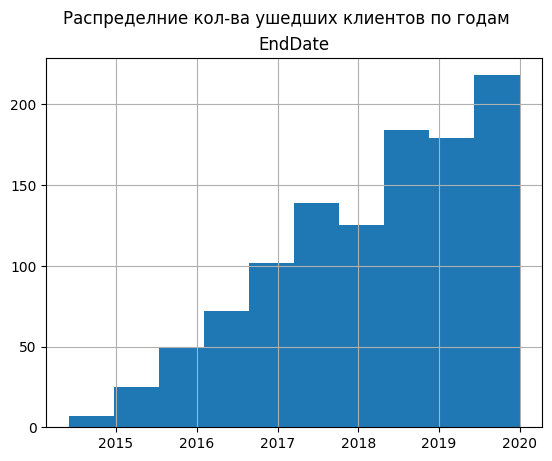

In [55]:
end_d = pd.DataFrame(contract['EndDate'])
end_d = end_d[end_d['EndDate']!='No']
end_d['EndDate'] = pd.to_datetime(end_d['EndDate'])
end_d.hist();
plt.suptitle("Распределние кол-ва ушедших клиентов по годам");  

Из графика видно, что потребность в определении клиентов, которые собираются уйти связана с тем, что их кол-во растет с каждым годом

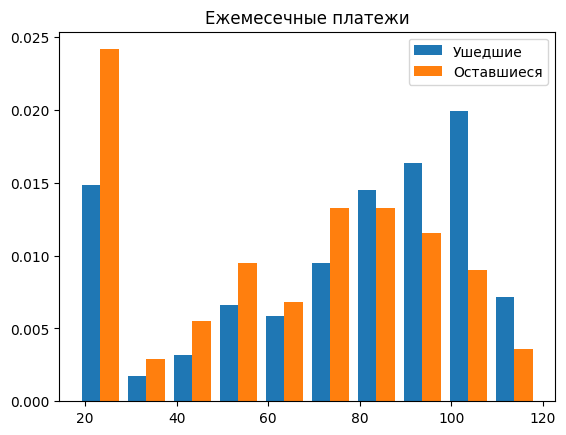

In [56]:
plt.hist([df[df.leave == 1].MonthlyCharges, df[df.leave == 0].MonthlyCharges], label=['Ушедшие', 'Оставшиеся'], density=True);
plt.legend();
plt.title('Ежемесечные платежи');
plt.show();

Видно, что в более дорогих сегментах ушедших больше, чем оставшихся.

Проверка корреляции

In [57]:
df = df.drop('customerID', axis = 1)

In [58]:
interval_cols = ['MonthlyCharges', 'TotalCharges', 'day']
phik_overview = df.phik_matrix(interval_cols=interval_cols)

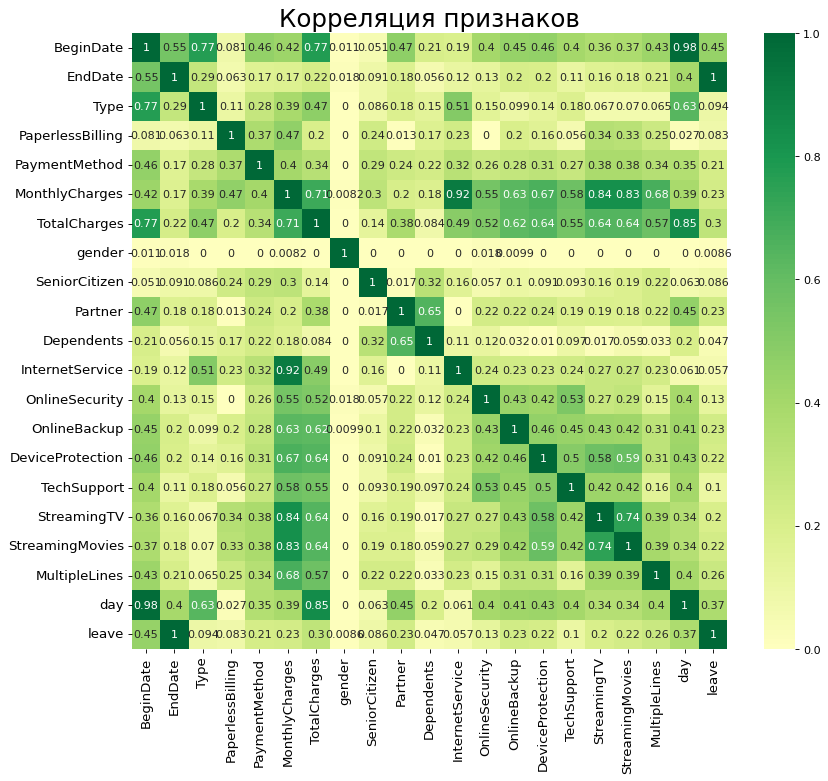

In [59]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(phik_overview, xticklabels=phik_overview.columns, yticklabels=phik_overview.columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Корреляция признаков', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Удалим признаки с датой, т.к. они мешают обучению модели. Также удалим признак, TotalCharges, т.к. он коррелирует с с датой подключения клиента(чем раньше, тем больше сумма)

In [60]:
del df['BeginDate'], df['EndDate'], df['TotalCharges']

Вопросы:
1. Что с данными в столбце Total Charges, они не преобразуются в целочисленные и в float
2. Данные в столбце month charges в основном ранвно 20.

План решения задачи:
1. Анализ данных
2. предобработка данных
3. Исследовательский анализ данных
4. Проверка мультиколлинеарности
5. Подготовка данных
6. Создание трансформера с OHE и scaler
7. Обучение пробных моделей
8. Подбор параметров - кроссвалидация
9. Тестирование лучшей модели
10. Вывод важности признаков

Цель проекта: научить модель прогнозировать отток клиентов.

<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по плану**

Андрей, к первому этапу отношу предварительный анализ, составление плана и вопросы, этот этап засчитываю, но стоит скорректировать некоторые моменты (в плане и по графикам). 
    
Проверку мультиколлинеарности отношу уже ко второму этапу. Также обращаю внимание, что еще не проведено содержательного анализа данных, что тоже ожидаю увидеть во второй части проекта.

**Успехов!** 😉

## Подготовка данных

Разбиение данных на признаки и таргет

In [61]:
features = df.drop('leave', axis = 1)
target = df['leave']

Разделение на обучающую и тестовую выборки

In [62]:
features_train, features_test, target_train, target_test = \
train_test_split(features, target, test_size=0.25, random_state=random, stratify=target)

Оценка распределения целевого признака

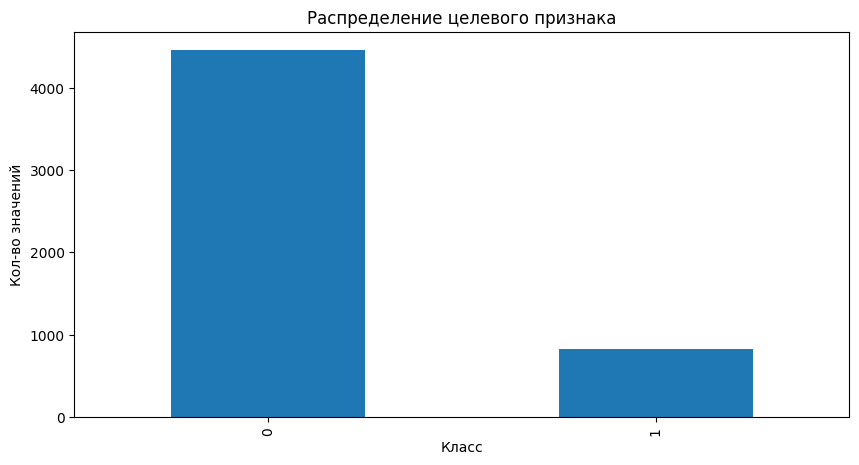

In [63]:
target_train.value_counts().plot(
    kind='bar', 
    figsize=(10, 5), 
    legend=False, 
    title='Распределение целевого признака', 
).set(xlabel='Класс', ylabel='Кол-во значений')
plt.show()

In [64]:
target_train[target_train == 0].shape[0] / target_train[target_train == 1].shape[0]

5.394673123486683

Распределение не равномерное, при использовании кросс валидации стоит использовать без увеличения выборки, что повлияет на качество линейных моделей.

Выделение категориальных признаков

In [65]:
ohe_features = features_train.select_dtypes(include='object').columns.to_list()
print(ohe_features)

['Type', 'PaperlessBilling', 'PaymentMethod', 'gender', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']


Выделение численных признаков

In [66]:
num_features = features_train.select_dtypes(exclude='object').columns.to_list()
num_features.remove('SeniorCitizen')
num_features

['MonthlyCharges', 'day']

Создание трансформера

In [67]:
col_transformer = make_column_transformer(
    (
        OneHotEncoder(drop='first', handle_unknown='error'),
        ohe_features
    ),
    (
        StandardScaler(), 
        num_features
    ),
    remainder='passthrough', verbose_feature_names_out=False
)

## Обучение моделей

Линейная модель

In [68]:
X_train_lr = features_train.copy()
Y_train_lr = target_train.copy()

In [69]:
%%time

model_lr = LogisticRegression(random_state=random)
pipline_lr = Pipeline(steps = [['transformer', col_transformer], \
                    ['lr', model_lr]])
param_grid = {'lr__solver' : ['saga'],
             'lr__max_iter' : [70]}

grid_lr = GridSearchCV(pipline_lr, param_grid, scoring='roc_auc', cv=5, n_jobs = -1)
grid_lr.fit(X_train_lr, Y_train_lr)
best_lr_param = grid_lr.best_estimator_
best_lr_score = grid_lr.best_score_

print(f'Гиперпараметры: {best_lr_param}')
print(f'ROC-AUC: {best_lr_score}')

Гиперпараметры: Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['Type', 'PaperlessBilling',
                                                   'PaymentMethod', 'gender',
                                                   'Partner', 'Dependents',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'MultipleLines']),
               

Случайный лес

In [70]:
X_train_rf = features_train.copy()
Y_train_rf = target_train.copy()

In [71]:
%%time

model_rf = RandomForestClassifier(random_state=random)

pipline_rf = Pipeline(steps = [['transformer', col_transformer], \
                    ['rf', model_rf]])

param_grid_rf = {
    'rf__n_estimators': range(50, 251, 50),
    'rf__max_depth': range(2, 15),
    'rf__min_samples_split': (2, 3, 4),
    'rf__min_samples_leaf': (1, 2, 3, 4)
}

# получается достаточно много комбинаций гиперпараметров при переборе
# будем использовать RandomizedSearchCV, он работает на много быстрее
gs_rf = RandomizedSearchCV(
    pipline_rf, 
    param_distributions=param_grid_rf, 
    scoring='roc_auc', 
    n_jobs=-1, 
    random_state=random
)

gs_rf.fit(X_train_rf, Y_train_rf)

gs_rf_best_score = gs_rf.best_score_ 
gs_rf_best_params = gs_rf.best_params_
print(f'best_score: {gs_rf_best_score}')
print(f'best_params: {gs_rf_best_params}')

best_score: 0.8160950825510355
best_params: {'rf__n_estimators': 200, 'rf__min_samples_split': 4, 'rf__min_samples_leaf': 1, 'rf__max_depth': 7}
CPU times: total: 688 ms
Wall time: 3.67 s


LightGBM

In [72]:
X_train_lg = features_train.copy()
Y_train_lg = target_train.copy()

In [73]:
%%time

model_lg = lgb.LGBMClassifier(random_state=random)

pipline_lg = Pipeline(steps = [['transformer', col_transformer], \
                    ['lg', model_lg]])

param_grid_lg = {
    'lg__n_estimators': range(10, 1500, 50),
    'lg__max_depth': range(10, 200, 2),
    'lg__learning_rate' : [0.1, 0.01, 0.001, 0.0001, 0.05, 0.005],
    'lg__num_leaves': range(1, 50, 2)}


gs_lg = RandomizedSearchCV(
    pipline_lg, 
    param_distributions=param_grid_lg, 
    scoring='roc_auc', 
    n_jobs=-1, 
    random_state=random,
    cv=3
)

gs_lg.fit(X_train_lg, Y_train_lg)

gs_lg_best_score = gs_lg.best_score_ 
gs_lg_best_params = gs_lg.best_params_
print(f'best_score: {gs_lg_best_score}')
print(f'best_params: {gs_lg_best_params}')

best_score: 0.8839169517679824
best_params: {'lg__num_leaves': 5, 'lg__n_estimators': 1410, 'lg__max_depth': 14, 'lg__learning_rate': 0.1}
CPU times: total: 1.38 s
Wall time: 3.28 s


In [74]:
result = pd.DataFrame(
    [best_lr_score, gs_rf_best_score, gs_lg_best_score], 
    index=['Linear model', 'RandomForestClassifier', 'LightGBM'], 
    columns=['ROC-AUC']
)
result

,ROC-AUC
Linear model,0.756196
RandomForestClassifier,0.816095
LightGBM,0.883917


In [75]:
result_t = pd.DataFrame(
    [grid_lr.cv_results_['mean_fit_time'][grid_lr.best_index_], gs_rf.cv_results_['mean_fit_time'][gs_rf.best_index_], gs_lg.cv_results_['mean_fit_time'][gs_lg.best_index_]], 
    index=['Linear model', 'RandomForestClassifier', 'LightGBM'], 
    columns=['Время обучения']
)
result_t

,Время обучения
Linear model,0.043745
RandomForestClassifier,0.553169
LightGBM,0.380735


Лучшие показатели roc-auc у модели LightGBM. 

## Проверка лучшей модели на тестовой выборке

In [76]:
pred = gs_lg.predict(features_test)
accuracy_score(target_test, pred)

0.9295854628052242

Точность предсказания модели 92,95 процентов

ROC-AUC score 0.9280973938578245


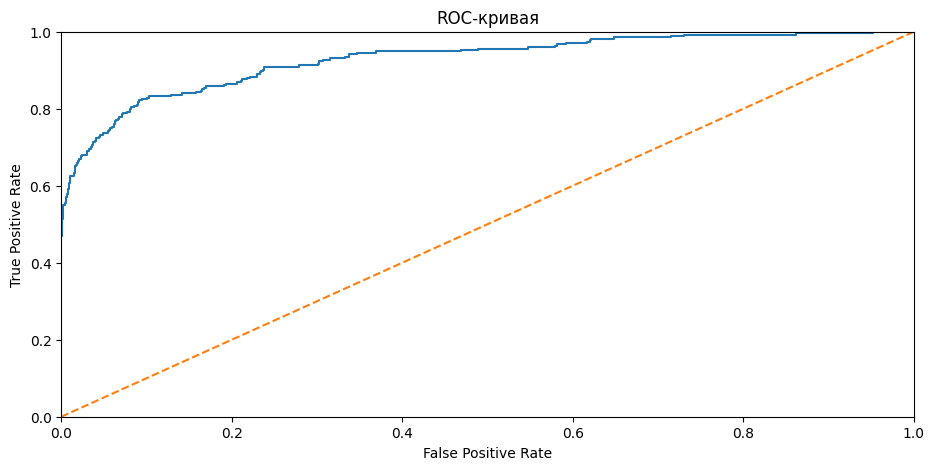

In [77]:
def roc_curve_plot(target_test, predictions):
    
    fpr, tpr, thresholds = roc_curve(target_test, predictions)

    plt.figure(figsize=(11, 5))
    
    plt.plot(fpr, tpr)
    
    plt.plot([0, 1], [0, 1], linestyle='--')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    plt.title('ROC-кривая')
    
    plt.show()

predicted_probalities = gs_lg.best_estimator_.predict_proba(features_test)[:, 1]
print('ROC-AUC score', roc_auc_score(target_test, predicted_probalities))
roc_curve_plot(target_test, predicted_probalities)

Итоговая модель превосходит бейзлайн, который у линейной модели = 0.75 на 17 пунктов, что является хорошим приростом

Выявление важности параметров

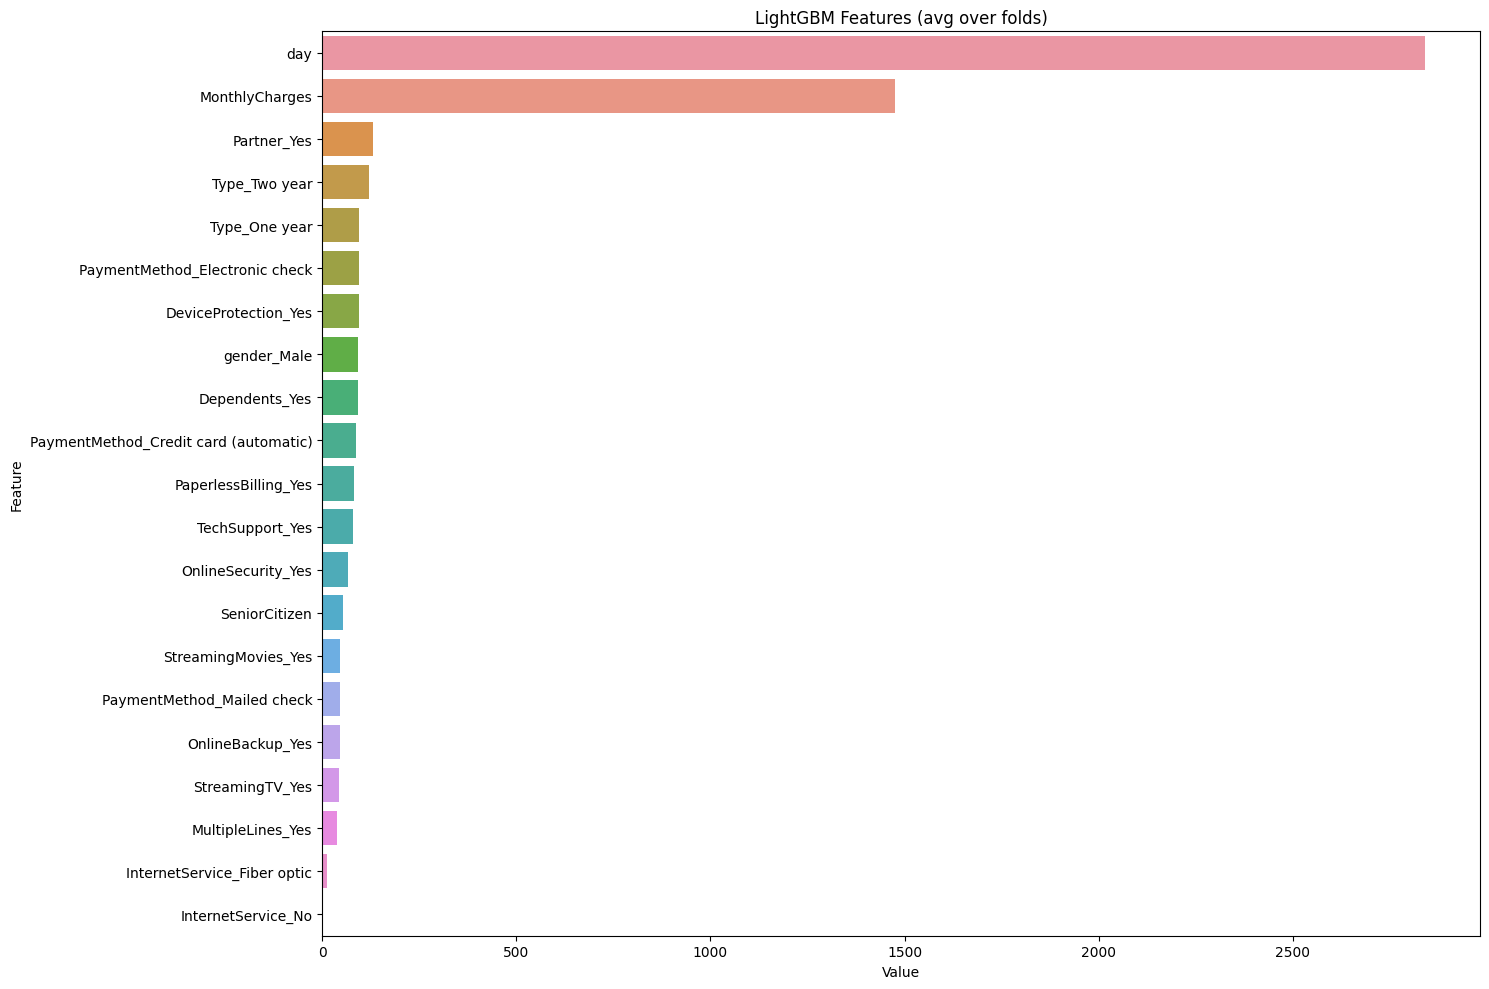

In [78]:
best_model_lg = gs_lg.best_estimator_
feature_importance = best_model_lg.named_steps['lg'].feature_importances_
feature_importance
feature_imp = pd.DataFrame(sorted(zip(feature_importance,best_model_lg.named_steps['transformer'].get_feature_names_out())), columns=['Value','Feature'])

plt.figure(figsize=(15, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

In [79]:
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

thresholds = arange(0, 1, 0.001)

scores = [f1_score(target_test, to_labels(predicted_probalities, t)) for t in thresholds]

ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.401, F-Score=0.75152


Изменение значений по порогу

In [80]:
pred = pd.DataFrame(predicted_probalities)
res = []
for i in range(len(pred)):
    if pred[0][i]>=0.401:
        res.append(1)
    else:
        res.append(0)
result = pd.DataFrame(res)
result

,0
0,0
1,1
2,0
3,0
4,0
...,...
1756,0
1757,0
1758,0
1759,1


In [81]:
confusion_matrix(target_test, result)

array([[1452,   34],
       [  89,  186]], dtype=int64)

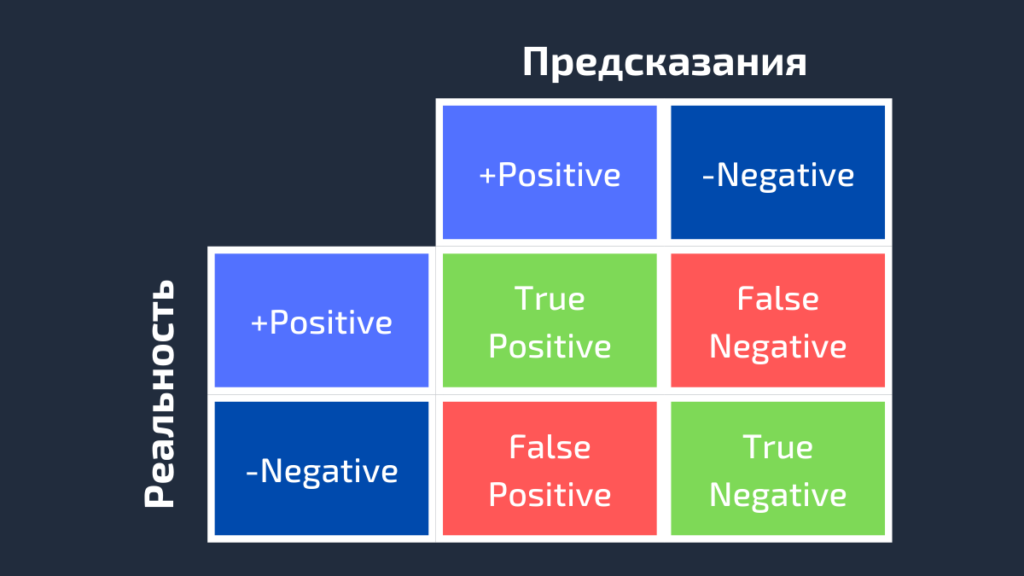

1638 правильных предсказаний. 186 клиентов удалось сохранить, предложив промокод, 89 клиента ушли, им не предложен промокод. 34 клиентам без надобности предложен промокод. В итоге ушло 89 клиентjd, без модели ушло бы 220 человек. 34 промокода выданы, потери зависят от размера скидки. Кол-во сохраненных клиентов явно превышает.

In [82]:
end = time.time() - start 
print(end)

14.103476524353027


## Вывод

Данную модель можно использовать для контроля оттока клиентов, т.к. точность её работы составляет 92,95%. Также значение roc-auc выше 0.92. У всех используемых признаков высокая важность, кроме OnlineBackup и OnlineSecurity. Самыми важными являются кол-во дней пользования абонента, затем платеж в месяц и наличие партнера, после идут вид платежа за месяц или год. Время выполнения всего кода составляет менее 15 секунд.

В данной построена модель по предсказанию того, откажется ли клиент от услуг оператора или нет.
Сначала проведен анализ данных. \
Произведена первичная обработка данных. \
Были добавлены 2 новых столбца - целевой признак Leave, отказался ли клиент от услуг и day - сколько по времени клиент пользовался услугами. \
После этого был проведен исследовательский анализ данных - проанализированы количественные и категоральные признаки, оценена корреляция между признаками, удалены признаки которые не нужны для обучения. \
Выводы, обычно от услуг отказываются те, кто платит больше. Вероятность отказа снижается со сроком пользования. \
Проведена подготовка данных к обучению моделей: удалены ненужные столбцы, создан трансформер с OHE и scaler, датафрейм был разделен на обучающую и тестовую выборки, проведен upsample менеьшего класса целевого признака. \ 
Затем на данных были обучены 3 модели: LogisticRegression, RandomForestClassifier и LightGBMClassifier. \
Лучший результат показала модель LightGBMClassifier со значением метрики ROC-AUC в 0.92, что выше, порогового значения, за которое мы взяли 0.85 \
Важными факторами являются вид платежа и наличие партнера, иждевенца.

# Отчёт

1. По плану решения задачи сначала был выполнен Анализ данных. Затем их предобратработка(пропуски и объединение), созданы новые признаки с кол-вом дней абонента в компании и целевым признаком ушел/остался клиент. Проверена мультиколлинеарность признаков. При подготовке данных удалены признаки с высокой корреляцией, данные разделены на обучающую и тестовую выборки. Далее создан трансформер с OHE и standartscaler. Обучены тестовые модели с кросс-валидацией в pipline. Лучшая модель lightGBM проверена на тестовых данных, пороговое значение пройдено. Выведены признаки по важности, самыми важными оказались кол-во дней абонента в компании и платёж в месяц. Все пункты изначального плана были выполнены.


2. В данных имеются неявные пропуски в сумме оплаты у клиентов, которые подключены в день выгрузки данных, также были неверные типы данных у даты и общей суммы, все ошибки устранены.

3. Ключевыми шагами являются Анализ данных - т.к. необходимо проверять пропуски, правильность типов данных, корреляцию, их предобработка - проверка баланса классов и устранение дисбаланса при необходимости, выделение признаков и целевого признака, разделение на обучающую и тестовую выборки(при необходимости поменять соотношение), создание трансформера также важно для обучения модели, т.к. числовым признакам нужно применить scaler, а к категориальным OHE, обучение тестовых моделей - этот этап важен для выявления лучшей модели на наших данных, проверка модели на тестовой выборке - важна для оценки переобучения модели..

4. При обучении модели использовались как категориальные с обработкой OHE, так и числовые с обработкой StandartScaler. Перед обучением из-за высокой корреляции удалены признаки BeginDate, EndDate, TotalCharges.

5. Итоговая лучшая модель - LightGBM, рекомендуется ее использование. С гиперпараметрами 'num_leaves': 5, 'lg__n_estimators': 1410, 'max_depth': 14, 'learning_rate': 0.1. Качество на обучающей выборке ROC-AUC =  0.88, на тестовой ROC-AUC = 0.928. Эта модель достаточно быстрая в сравненнии с другими моделями бустинга. Время подбора параметров составляет ~3 сек., а обучение 0.3 сек. Данный результат будет достигнут, если придерживаться плана и соблюдать рекомендации по ключевым шагам.